# Class Construction Tutorial

In [1]:
#don't leave home without these
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Norm:
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma


#create an instance of a Norm
norm = Norm(mu=10, sigma=2)
print(f'Norm: {norm}')

Norm: <__main__.Norm object at 0x000001CCA2CAB2E0>


Let's beautify the printing of our object.

If the class defininition contains an  ``__repr__`` method, it gets called whenever a string representation of a class instance is needed. Among other places this happens when you print an instance.

In [3]:
class Norm:
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma

    def __repr__(self):
        repr_str = f'Normal object, mu: {self.mu}, sigma: {self.sigma}'
        return repr_str
    


#create an instance of a Norm
norm = Norm(mu=10, sigma=2)
print(f'Norm: {norm}')

Norm: Normal object, mu: 10, sigma: 2


Another handy _special method_ is `__len__(self)`. This method can be useful if your class represents a collection of things. Often you need to know how many objects are in a particular instance; the `__len__` method is called via something like `n_objs = len(myinstance)`. For the class we're demonstrating here, we don't need these so we won't implement this method.

See the [Python Turorial](https://www.pythontutorial.net/python-oop/python-\_\_repr\_\_/) on this topic.

Let's implement a class method that calculates the probability density function for a Normal (Gaussian) Distribution:

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$
where $\mu$ and $\sigma$ are the mean and standard deviation respectively of the distrution. We'll implement this for set of x values that the class instance passes in.

In [4]:
class Norm:
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma

    def __repr__(self):
        repr_str = f'Normal object, mu: {self.mu}, sigma: {self.sigma}'
        return repr_str

    def pdf(self, x=None, n=1000):
        #if no x supplied, calculate between +/- 5 standard deviations
        if x is None:
            lo = self.mu - 5*self.sigma
            hi = self.mu + 5*self.sigma
            x = np.linspace(lo, hi, n)

        const = 1/(self.sigma*np.sqrt(2*np.pi))
        expnt = -1*((x-self.mu)**2)/(2*self.sigma**2)
        f_x = const*np.exp(expnt)
        
        return f_x


Text(0.5, 1.0, 'Standard Normal Density Function')

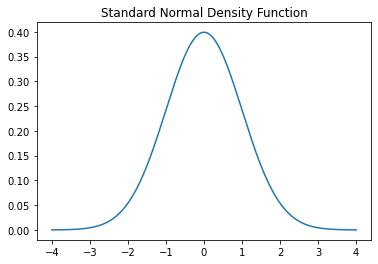

In [5]:
std_normal = Norm()
xx = np.linspace(-4, 4, 3000)
norm_pdf = std_normal.pdf(xx)

plt.plot(xx, norm_pdf)
plt.title('Standard Normal Density Function')

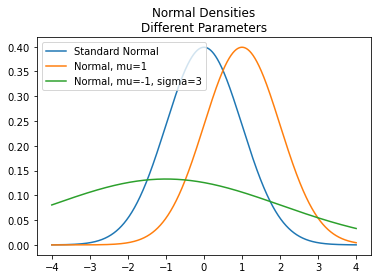

In [6]:
plt.plot(xx,norm_pdf, label='Standard Normal')
plt.plot(xx, Norm(mu=1).pdf(xx), label='Normal, mu=1')
plt.plot(xx, Norm(mu=-1, sigma=3).pdf(xx), label='Normal, mu=-1, sigma=3')
plt.title('Normal Densities\nDifferent Parameters')
plt.legend()

## Your Turn: Implement Black Body Class!

Stars shine with a spectrum of approximately that of a black body. In here you'll explore the spectra and frequencies at which black bodies achieve their maximum intensities.
To do this exploration, you'll define a Python class called `BlackBody` which will house the attributes and methods you'll need.

The primary attribute of a black body radiator is its temperature.  In the code block below, define the `BlackBody` class, create its constructor (i.e. the `__init__` method) and a `__repr__` method so that it prints out nicely.  The ``__init__`` method should accept the black body's temperature (in Kelvin)

In [7]:
class BlackBody:
    def __init__(self, temp):
        #temp in Kelvin
        self.temp = temp

    def __repr__(self):
        repr_str = f'BlackBody object, temperature: {self.temp}'
        return repr_str

#instantiate the BlackBody defined above
bb = BlackBody(5800)
bb

BlackBody object, temperature: 5800

## Black Body Spectrum

Planck's law allows the calculation of intensity (radiative power) of black body radiating at a specific temperature as a function of wavelength. The formula is:

$$
B_\lambda(\lambda, T) = \frac{2hc^2}{\lambda^5}\frac{1}{e^\frac{hc}{\lambda k_B T} -1}
$$

Often this calculation is carried out in `cgs` units which we will do here. Thus, the input parameters are temperature in $K$ and $\lambda$ (wavelenth) in $cm$. The units of the output are
$erg\ s^{-1}\ cm^{-2}\ cm^{-1}\ sr^{-1}$

Here are some useful constants:
```python
        #some constants we'll need (cgs units)
        c = 3e10 #cm s^-1; speed of light
        h = 6.6e-27 #erg s; Planck's constant
        k = 1.4e-16 #erg k^1; Boltzmann's constant
```

Implement the `spectrum` method on your `BlackBody` class.  It should accept an input argument which is a vector of wavelengths (in centimeters) and return a vector containing the spectral intensity at each wavelength.

In [8]:
class BlackBody:

    def __init__(self, temp):
        #temp in Kelvin
        self.temp = temp

    def __repr__(self):
        repr_str = f'BlackBody object, temperature: {self.temp}'
        return repr_str

    def spectrum(self, lmbda):
        #some constants we'll need (cgs units)
        c = 3e10 #cm s^-1; speed of light
        h = 6.6e-27 #erg s; Planck's constant
        k = 1.4e-16 #erg k^1- ; Boltzmann's constant

        #construct the spectrum as product of two terms
        #first term:
        first_term = (2*h*c**2)/np.power(lmbda, 5)

        #second term:
        expnt = h*c/(lmbda*k*self.temp)
        second_term = 1/(np.exp(expnt)-1)

        spec = first_term*second_term

        return spec
        


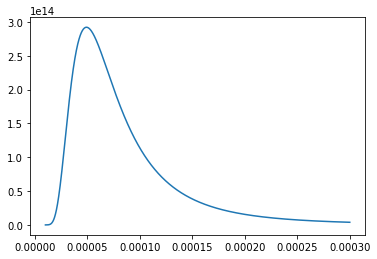

In [9]:
# Plot a spectrum for a 5800 K radiating body (like the Sun)

bb = BlackBody(5800)
# spectral range: uv to beyond ir in cm:
uv = 100 #nanometers
ir = 3000 #wayout past IR (nanometers)

nanometer_per_cm = 1e7
#wavelength range over which we'll compute the spectrum
lmbda = np.linspace(uv/nanometer_per_cm, ir/nanometer_per_cm, 10000)

#compute the spectal density for the wavelength range
spec = bb.spectrum(lmbda)

#what did we get?
plt.plot(lmbda, spec)

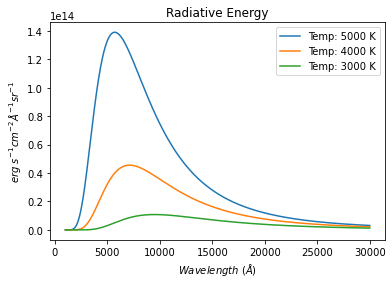

In [10]:
#Plot a few spectra for different temperatures

#plot x axis in angrstrom
angstrom_per_cm = 1e8
lmbda_ang = lmbda*angstrom_per_cm

plt.plot(lmbda_ang, BlackBody(temp=5000).spectrum(lmbda), label='Temp: 5000 K')
plt.plot(lmbda_ang, BlackBody(temp=4000).spectrum(lmbda), label='Temp: 4000 K')
plt.plot(lmbda_ang, BlackBody(temp=3000).spectrum(lmbda), label='Temp: 3000 K')

#fancy labeling
plt.xlabel('$Wavelength\ (\AA)$')
plt.ylabel('$erg\ s^{-1} cm^{-2} \AA^{-1}sr^{-1}$')
plt.title('Radiative Energy') 
plt.legend()

## Wien's Law

Wein's Law enables you to calculate the wavelength at which the maximum black body intensity occurs.  It is:

$$
\lambda_{max}T = 0.29\ cm\ K
$$
or
$$
\lambda_{max} = (0.29\ cm\ K)/T
$$

for a given temperature in Kelvin, $\lambda_{max}$ will come out in units of $cm$

Use the formula above to implement a method called `Wien` that returns $\lambda_{max}$ for a BlackBody instance.

In [11]:
class BlackBody:

    def __init__(self, temp):
        #temp in Kelvin
        self.temp = temp

    def __repr__(self):
        repr_str = f'BlackBody object, temperature: {self.temp}'
        return repr_str

    def spectrum(self, lmbda):
        #some constants we'll need (cgs units)
        c = 3e10 #cm s^-1; speed of light
        h = 6.6e-27 #erg s; Planck's constant
        k = 1.4e-16 #erg k^1- ; Boltzmann's constant

        #construct the spectrum as product of two terms
        #first term:
        first_term = (2*h*c**2)/np.power(lmbda, 5)

        #second term:
        expnt = h*c/(lmbda*k*self.temp)
        second_term = 1/(np.exp(expnt)-1)

        spec = first_term*second_term

        return spec

    def Wien(self):
        lmbda_max = 0.29/self.temp
        return lmbda_max
        


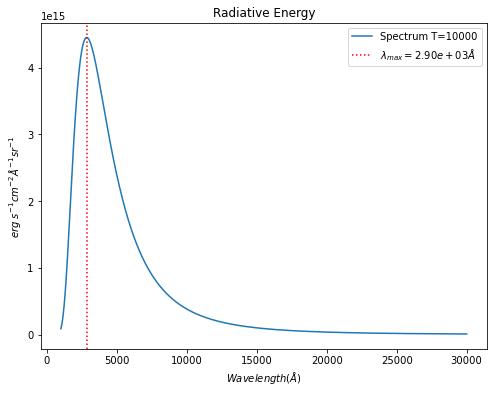

In [12]:
#plot lambda_max versus the spectrum for a given temp

uv = 100 #nanometers
#ir = 780 #nanometers
ir = 3000 #wayout past IR

nanometer_per_cm = 1e7
lmbda = np.linspace(uv/nanometer_per_cm, ir/nanometer_per_cm, 10000)

temp = 10000
t5000 = BlackBody(temp=temp)
t5000_spec = t5000.spectrum(lmbda = lmbda)

# calculate labmda_max using your Wien method
t5000_max = t5000.Wien()

fig, ax = plt.subplots(figsize=(8,6))
lmax = f'{t5000_max*angstrom_per_cm:.2e}'
ax.plot(lmbda*angstrom_per_cm, t5000_spec, label=f'Spectrum T={temp}')
ax.axvline(t5000_max*angstrom_per_cm, color='red', ls=':',
    label=r'$\lambda_{max} = '+lmax+' \AA$')

ax.set_xlabel('$Wavelength (\AA)$')
ax.set_ylabel('$erg\ s^{-1} cm^{-2} \AA^{-1}sr^{-1}$')
ax.set_title('Radiative Energy')
ax.legend()